<a href="https://colab.research.google.com/github/Karthiknori/Multi-Label-Image-Classification-on-Movies-Poster-using-CNN./blob/master/Multi_Label_Image_Classification_on_Movies_Poster_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
pip install tensorflow-gpu==2.0.0-rc0


In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential

In [0]:
from tensorflow.keras.layers import Flatten,Dropout,Dense,BatchNormalization,Conv2D,MaxPool2D

In [0]:
from tensorflow.keras.optimizers import Adam

In [0]:
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt


In [0]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [30]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

fatal: destination path 'Movies-Poster_Dataset' already exists and is not an empty directory.


In [31]:
data = pd.read_csv('/content/Movies-Poster_Dataset/train.csv')
data.shape

(7254, 27)

In [32]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [33]:
img_width = 350
img_height = 350

X = []

for i in tqdm(range(data.shape[0])):
  path = '/content/Movies-Poster_Dataset/Images/' + data['Id'][i] + '.jpg'
  img = image.load_img(path, target_size=(img_width, img_height, 3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

100%|██████████| 7254/7254 [00:27<00:00, 259.75it/s]


In [34]:
X.shape

(7254, 350, 350, 3)

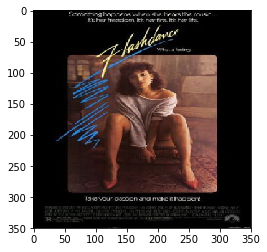

In [35]:
plt.imshow(X[1]);

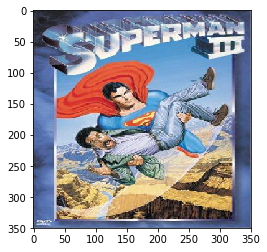

In [36]:
plt.imshow(X[10]);

In [37]:
data['Genre'][1]

"['Drama', 'Romance', 'Music']"

In [38]:
y = data.drop(['Id','Genre'],axis= 1)
y = y.to_numpy()
y.shape

(7254, 25)

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 0 , test_size = 0.15)

# BUILD CNN

In [0]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(25, activation='sigmoid'))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization_6 (Batch (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 174, 174, 16)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_7 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 86, 86, 32)       

In [0]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [43]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Train on 6165 samples, validate on 1089 samples
Epoch 1/5
6165/6165 [==============================] - 190s 31ms/sample - loss: 0.7056 - accuracy: 0.6473 - val_loss: 0.2888 - val_accuracy: 0.9044
Epoch 2/5
6165/6165 [==============================] - 190s 31ms/sample - loss: 0.3146 - accuracy: 0.8903 - val_loss: 0.2518 - val_accuracy: 0.9067
Epoch 3/5
6165/6165 [==============================] - 189s 31ms/sample - loss: 0.2623 - accuracy: 0.9065 - val_loss: 0.2644 - val_accuracy: 0.9088
Epoch 4/5
6165/6165 [==============================] - 191s 31ms/sample - loss: 0.2526 - accuracy: 0.9097 - val_loss: 0.2470 - val_accuracy: 0.9119
Epoch 5/5
6165/6165 [==============================] - 190s 31ms/sample - loss: 0.2463 - accuracy: 0.9114 - val_loss: 0.2417 - val_accuracy: 0.9095


In [0]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

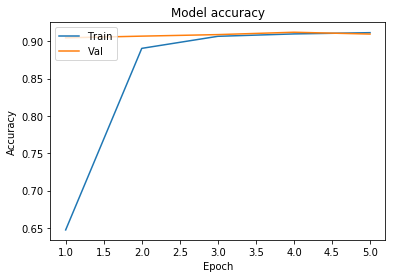

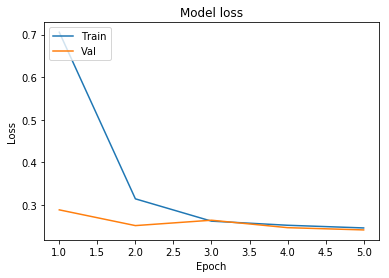

In [45]:
plot_learningCurve(history, 5)

#Testing of Model


Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
Drama
Comedy
Action


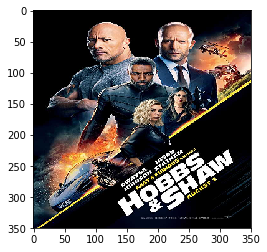

In [51]:
img = image.load_img('fast.png', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]
print(classes)
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])


In [52]:
y_prob[0]

array([0.27218598, 0.1249285 , 0.02527186, 0.05363843, 0.31617498,
       0.18948501, 0.08019176, 0.5134817 , 0.04447389, 0.07166719,
       0.02912211, 0.05191982, 0.03756163, 0.01287094, 0.06151667,
       0.00407106, 0.00411728, 0.00296333, 0.16016394, 0.0518223 ,
       0.00751027, 0.0227105 , 0.15796182, 0.01863715, 0.00750603],
      dtype=float32)